# YouTube Comments Sentiment Analysis
Andie Donovan 

## 1 Set Up

### 1.1 Import Basic Modules

In [474]:
# Basics
import pandas as pd
import os
import csv
import numpy as np
import re

### 1.2 Read Data
Note that we have to use encoding = "latin-1" instead of UTF-8 because we have foreign languages present
The different encodings treat characters differently (in latin-1 each character is only one byte long whereas in utf-8 it can me more than one byte in length). Typically utf-8 captures more types of characters, so it was surprising that we had to use latin-8. 
* for later: look into this more: http://www.unicode.org/reports/tr10/

In [475]:
os.chdir('/Users/andiedonovan/myProjects/Youtube_Python_Project/AndiesBranch/') # change directory
df = pd.read_csv('OKGOcomments.csv', delimiter=";", skiprows=2, encoding='latin-1', engine='python') # read in the data

df.head(5)

### 1.2.1 Clean Data Columns

In [476]:
# rename the columns
df.columns = [
  'label',
  'comment','a','b'
]
df = df.drop(['a', 'b'], axis = 1).dropna() # drop column 3 and missing values
print(df.head(5))

   label                                            comment
0   -1.0  Everyone knows brand's papers from.\nBut -No o...
1    0.0       ÒYour paper cut balance is: \n-£25279102771Ó
2    1.0  OH SHIT WHEN I SAW THIS ON MY FRONT PAGE.........
3    1.0                          Blowing my mind yet again
4    0.0               Should have gone with Dunder Mifflin


### 1.2.2 Remove non-alphabetic characters (including numbers)

In [477]:
for row in range(len(df)):
    line = df.iloc[row,1]
    df.iloc[row,1] = re.sub("[^a-zA-Z]", " ", line)

In [478]:
df.head(3)

,label,comment
0,-1.0,Everyone knows brand s papers from But No on...
1,0.0,Your paper cut balance is
2,1.0,OH SHIT WHEN I SAW THIS ON MY FRONT PAGE ...


## 2 Natural Language Processing

### 2.1 Import sklearn and nltk packages

In [417]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# tokenizer = nltk.tokenize.WhitespaceTokenizer()
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/andiedonovan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andiedonovan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2.2 Tokenize Words

In [418]:
df['com_token']=df['comment'].str.lower().str.split()

### 2.2 Remove Stop Words

In [419]:
from nltk.corpus import stopwords

nltk.download('stopwords')
sw = stopwords.words('english')

df['com_remv']=df['com_token'].apply(lambda x: [y for y in x if y not in sw])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andiedonovan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [420]:
df.head(3)

,label,comment,com_token,com_remv
0,-1.0,Everyone knows brand s papers from But No on...,"[everyone, knows, brand, s, papers, from, but,...","[everyone, knows, brand, papers, one, knows, w..."
1,0.0,Your paper cut balance is,"[your, paper, cut, balance, is]","[paper, cut, balance]"
2,1.0,OH SHIT WHEN I SAW THIS ON MY FRONT PAGE ...,"[oh, shit, when, i, saw, this, on, my, front, ...","[oh, shit, saw, front, page, love, song]"


### 2.3 Lemmatization (and Stemming?)

In [421]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

#df['com_stem']=df['com_token'] \
#    .apply(lambda x : [ps.stem(y) for y in x]) # stemming

df["com_lemma"] = df['com_token'] \
    .apply(lambda x : [lemmatizer.lemmatize(y) for y in x]) # lemmatization

### 2.4 Split into Training and Test Data
Using a pre-defined train-test-split function, we randomly split the data into training data (75%) and test data (25%). We set the x variable for both to the comments, since these are the attributes we will use for classificationand the y variable to the label, as this is what we are trying to predict. The random_state paramteter is simply for reproducability (otherwise the function would produce a different split every time we ran it). 

In [422]:
import sklearn # machine learning
from sklearn.model_selection import train_test_split # splitting up data

In [423]:
df["com_lemma_str"] = df["com_lemma"].apply(', '.join)

In [424]:
df.head(4)

,label,comment,com_token,com_remv,com_lemma,com_lemma_str
0,-1.0,Everyone knows brand s papers from But No on...,"[everyone, knows, brand, s, papers, from, but,...","[everyone, knows, brand, papers, one, knows, w...","[everyone, know, brand, s, paper, from, but, n...","everyone, know, brand, s, paper, from, but, no..."
1,0.0,Your paper cut balance is,"[your, paper, cut, balance, is]","[paper, cut, balance]","[your, paper, cut, balance, is]","your, paper, cut, balance, is"
2,1.0,OH SHIT WHEN I SAW THIS ON MY FRONT PAGE ...,"[oh, shit, when, i, saw, this, on, my, front, ...","[oh, shit, saw, front, page, love, song]","[oh, shit, when, i, saw, this, on, my, front, ...","oh, shit, when, i, saw, this, on, my, front, p..."
3,1.0,Blowing my mind yet again,"[blowing, my, mind, yet, again]","[blowing, mind, yet]","[blowing, my, mind, yet, again]","blowing, my, mind, yet, again"


In [425]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                    df["com_lemma_str"], df["label"], 
                                    test_size=0.25, 
                                    random_state=42)

Let's make sure all of the data looks good:

### 2.5 Check for missing values

In [426]:
print('lengths training variables: ', len(X_train),",", len(Y_train))
print('lengths testing variables: ', len(X_test),",", len(Y_test), '\n')

print('Are there any missing values?', 
      '\n * Training:', pd.isnull(X_train).values.any(), ',', pd.isnull(Y_train).values.any(), 
      '\n * Testing: ', pd.isnull(X_test).values.any(), ",", pd.isnull(Y_test).values.any())

lengths training variables:  1495 , 1495
lengths testing variables:  499 , 499 

Are there any missing values? 
 * Training: False , False 
 * Testing:  False , False


In [427]:
type(X_test) # we have a pandas core Series; we just want the comments in an array without numbering
# help(X_test) # use values attribute
# we will want to use X_test.values(), Y_train.values(), .... to just access the data in list format

pandas.core.series.Series

In [428]:
X_test.head(3)

893     i, am, actually, so, hyped, for, the, great, fire
1676    how, doe, damian, even, come, up, with, these,...
416     they, re, likely, not, printing, the, paper, o...
Name: com_lemma_str, dtype: object

# 3.0 TF-IDF Transformation
Documentation: [Scikit-Learn Documentation]('http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#exercise-2-sentiment-analysis-on-movie-reviews')

We want to initialize a Count Vectorizer, which will convert the comments to a matrix of token (word) counts. This produces a sparse representation of the counts
We then fit the model using our training data

In [433]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

## 3.1 Transform Data to Counts 
source: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/

instead of just counting the number of occurences bluntly, the term frequency inverse document frequency transformation weights words based on their number of occurences in each document (aka comment) compared to occurences in the entire corpus (aka collection of comments)

In [434]:
tfidf = TfidfVectorizer()
xtrain = tfidf.fit_transform(X_train)
xtest = tfidf.transform(X_test)

In [435]:
#print(xtrain.vocabulary_)
#print(xtrain.idf_)

## 4.0 MNB Model

In [436]:
from sklearn.naive_bayes import MultinomialNB 

mnb = MultinomialNB()
mnb.fit(xtrain, Y_train) # fit the model on the training data word counts and training data lables
mnb_predict = mnb.predict(xtest) # make our y predictions (labels) on the comment test data
for i in mnb_predict[:5]:
    print (i)

1.0
1.0
0.0
1.0
0.0


## 4.1  Make MNB Predictions

In [437]:
from sklearn import metrics # for accuracy/ precision
mnb_predict = mnb.predict(xtest) # make our y predictions (labels) on the comment test data

In [438]:
unique, counts = np.unique(mnb_predict, return_counts=True)
dict(zip(unique, counts))

{-1.0: 7, 0.0: 339, 1.0: 153}

## 4.2 MNB Model Evaluation

In [439]:
mnb_acc = metrics.accuracy_score(Y_test, mnb_predict)
print('We obtained ', round(mnb_acc, 6), '% accuracy for the model \n \n')
np.mean(mnb_predict == Y_test)  # same score, different method
print('Here is the Classification Report: \n')
print(metrics.classification_report(Y_test, mnb_predict))

We obtained  0.61523 % accuracy for the model 
 

Here is the Classification Report: 

             precision    recall  f1-score   support

       -1.0       0.86      0.06      0.11       106
        0.0       0.57      0.85      0.68       226
        1.0       0.71      0.65      0.68       167

avg / total       0.68      0.62      0.56       499



## 4.3 MNB Confusion Matrix

In [440]:
print('Here is the Confusion Matrix: \n')
metrics.confusion_matrix(Y_test, mnb_predict)

Here is the Confusion Matrix: 



array([[  6,  87,  13],
       [  1, 193,  32],
       [  0,  59, 108]])

## 5.0 Using the SGD (Stochastic Gradient Descent) Learning 
> "The gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance. This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM)."
[Scikit-Learn Documenttion](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)


Essentially SGD tries to find an extrema through iteration. In this case we are dealing with likelihood functions in which each algorithm tries to find the classification (positive, neutral or negative) with the highest likelihood of occuring (or probability of being correct in a sense). We want to maximize this likelihood while minimizing inaccuracies (Type I/ Type II Errors) and computational expenditure. We might have to revisit material on [Statistical Powers](https://en.wikipedia.org/wiki/Statistical_power). The count vectorizer transformation converts our data to a sparse matrix, which represents the model features (aka comments & their word counts) in matrix-form where the majority of the entries are zero. 



**Loss-Functions**: maps different events to a "cost" or price paid for inaccuracy of predictions/ classifications. Purpose is to choose the optimal loss function (aka try to minimize costly inaccuracies)

In [441]:
from sklearn.linear_model import SGDClassifier # Support Vector Machine Classifier

## 6.0 Logistic Regression

In [442]:
sgd = SGDClassifier(loss='log', penalty='l2', alpha=1e-3, max_iter=5, tol=None, random_state=1) 
sgd.fit(xtrain, Y_train)
sgd_predict = sgd.predict(xtest)
sgd_acc = metrics.accuracy_score(Y_test, sgd_predict)
print('We obtained ', round(sgd_acc, 6), '% accuracy for the logistic regression model')

We obtained  0.651303 % accuracy for the logistic regression model


**Classifier Parameters:**
* loss parameter set to 'log' to use logistic regression
* penalty: regularization term; sparsity or feature selection
    * the process of introducing additional information in order to prevent overfitting/ sparsity overlaps: [regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics))
* alpha: smoothing parameter? 
* max_iter: how many times to pass over the training data
* tol: stopping criterion; counts losses
* verbosity - using more factors than necessary; want to maximize parsimony

## 7.0 Linear Support Vector Machine (SVM)

In [444]:
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=5, tol=None, random_state=1) # penalty, loss, alpha paramters
svm.fit(xtrain, Y_train)
svm_predict = svm.predict(xtest)
svm_acc = metrics.accuracy_score(Y_test, svm_predict)
print('We obtained ', round(svm_acc, 6), '% accuracy for the SVM model')

We obtained  0.665331 % accuracy for the SVM model


We specify the loss parameter to 'hinge' to use linear SVM 

## 8.0 Esemble Learning
[link](http://scikit-learn.org/stable/modules/ensemble.html)

In [445]:
from sklearn.ensemble import BaggingClassifier # bagging ensemble method
from sklearn.ensemble import RandomForestClassifier # random forest ensemble method
from sklearn.neighbors import KNeighborsClassifier # k-NN ensemble method

## 8.1 KNN

In [446]:
bagcls = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)
bagcls = bagcls.fit(xtrain, Y_train)

bag_predict = bagcls.predict(xtest)
bag_acc = metrics.accuracy_score(Y_test, bag_predict)
print('We obtained ', round(bag_acc, 6), '% accuracy for the Bagging model')

We obtained  0.53507 % accuracy for the Bagging model
We obtained  0.637275 % accuracy for the Random Forest model


## 8.2 Random Forest

In [ ]:
ranfor = RandomForestClassifier(n_estimators=10)
ranfor = ranfor.fit(xtrain, Y_train)

rf_predict = ranfor.predict(xtest)
rf_acc = metrics.accuracy_score(Y_test, rf_predict)
print('We obtained ', round(rf_acc, 6), '% accuracy for the Random Forest model')

## 9.0 Data Visualizations

In [461]:
# Dashboard/ Plotly Packages:
import plotly.dashboard_objs as dashboard
import IPython.display
from IPython.display import Image
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from pylab import *

from wordcloud import WordCloud

### 9.1 Pie Chart

In [465]:
df.groupby(['label']).size()
neg_sent = df.loc[df['label'] < 0]
zer_sent = df.loc[df['label'] == 0]
pos_sent = df.loc[df['label'] > 0]
d1 = len(neg_sent); d2 = len(zer_sent); d3 = len(pos_sent)

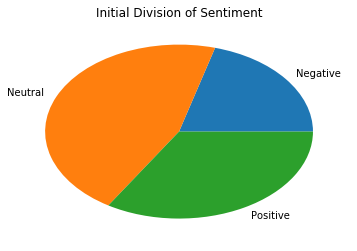

In [466]:
labels = ['Negative','Neutral', "Positive"]
values = [d1, d2, d3]
#trace = go.Figure(labels=labels, values=values)
#iplot(trace)

pie(values, labels=labels)
title('Initial Division of Sentiment')
show()

### 9.2 Bar Chart of Accuracies

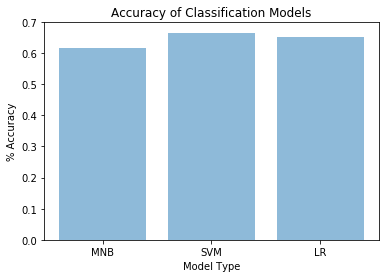

In [467]:
labels = ['MNB','SVM', "LR"]
values = [mnb_acc, svm_acc, sgd_acc]
ypos = np.arange(len(labels))

plt.bar(ypos, values, align='center', alpha=0.5)
plt.xticks(ypos, labels)
plt.ylabel('% Accuracy')
plt.xlabel('Model Type')
plt.title('Accuracy of Classification Models')
show()

### 9.3 WordCloud

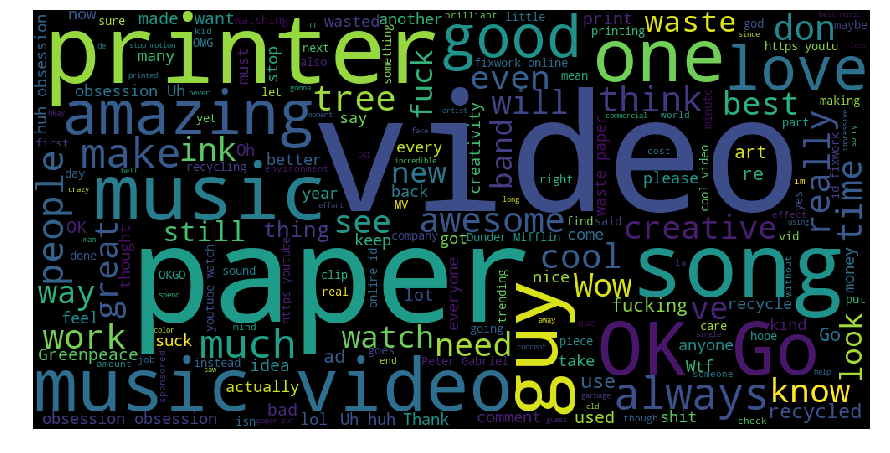

In [455]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df["comment"]))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 9.4 Table of Model Results

In [470]:
myTable = pd.DataFrame(columns=['MNB','SGD','LR', 'LSV', 'Bag', 'RF'],
                   index=["Acc"])

In [471]:
myTable['MNB']=mnb_acc; myTable['SGD']=sgd_acc; myTable['LR']=sgd_acc
myTable['LSV']= svm_acc; myTable['Bag']= bag_acc; myTable['RF']= rf_acc
myTable

,MNB,SGD,LR,LSV,Bag,RF
Acc,0.61523,0.651303,0.651303,0.665331,0.53507,0.637275


## 10.0 Results

From the 6 different machine learning models attempted, Linear Support Vector Machine gave the highest accuracy. Converseley, KNN gave the lowest accuracy.

### Next Steps: 
* look into why MNB performed worse with tf-idf transformed data (while the rest seemed to improve)
* look into the benefits of stemming as opposed to lemmatization
* word tagging, n-grams 
* apply grid search to determine optimal parameters, especially for models like random forest where it can make a big difference in the model performance
* apply a mulitlayer perceptron neural network (with grid search for layers and blocks)
* figure out why plotly dashboard does not rendering offline 

### More Notes: 
1. Feature Engineering:
    * Look at Peter Norvig's [Spelling Corrector](http://norvig.com/spell-correct.html)
    * Meta Features, Stemming, Speech Tagging, etc.:
        * [NLP Blog Post](http://www.vikparuchuri.com/blog/natural-language-processing-tutorial/)
        * [Stanford Post](https://nlp.stanford.edu/IR-book/html/htmledition/features-for-text-1.html)
3. Add more videos/ comments for diversity of diction/ sentiments
4. Print comments and their predicted classification: highlight the correct ones in green and the wrong ones in red
5. Data Visualization / Dashboard Resources:
    * [Plotly](https://plot.ly/python/create-online-dashboard/)
    * [Tutorial](https://moderndata.plot.ly/create-a-plotly-dashboards-in-under-10-minutes/)